## Laboratory Session 03
### Sabrina Giorgetti
### Matricola: 2013375
### Email: sabrina.giorgetti@studenti.unipd.it

In [9]:
# for full width
#IRdisplay::display_html('<style>.container { width:75% !important; }</style>')

library(ggplot2)
library(tidyverse)
library(gridExtra)
require(readr)
library(purrr)
library(EnvStats)
library(GoFKernel)
library(latex2exp)
library(ggpubr)
library(lubridate)

#options(repr.plot.width = 10, repr.plot.height = 6) 


### Exercise 1 

The triangular distribution, in the interval (a,b), is given by the following:

$$
f(X)=\left\{\begin{array}{ll}
\frac{2(x-a)}{(b-a)(c-a)} & a \leq x<c \\
\frac{2(b-x)}{(b-a)(b-c)} & c \leq x \leq b \\
0 & \text { otherwise }
\end{array}\right.
$$


where c ‚àà[a,b]

A. Plot the function, given the interval (a,b)

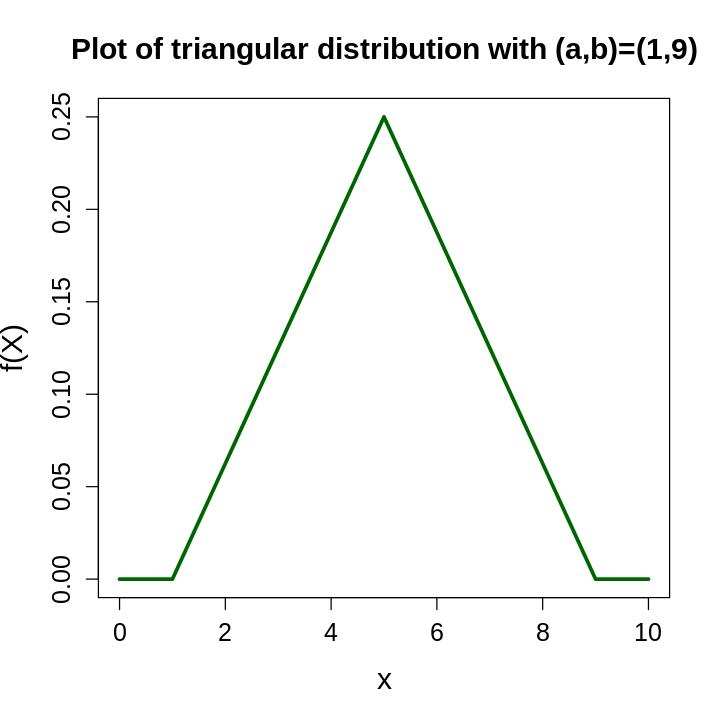

In [2]:
func <- function(x,a,b,c) {
    f <-ifelse(a<=x & x<c, 2*(x-a)/((b-a)*(c-a)), ifelse(c<=x & x<=b, 2*(b-x)/((b-a)*(b-c)),0))
    return(f)
}


options(repr.plot.width = 6, repr.plot.height = 6)
x <-seq(0,10,0.001)
plot(x,func(x,1,9,5), type="l",col="darkgreen", xlab="x",ylab="f(X)",  main = "Plot of triangular distribution with (a,b)=(1,9)",
                   cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5,lwd=3)



    

B. And write an algorithm to generate random numbers from the triangular distribution

To write an algorithm to generate random numbers from the triangular distribution we can define the other statistical distribution and generate random number with the function that we'll call "func_r".

In [3]:
func_cdf <- function(x){
    a<-1 #define inside in order to calculate q with inverse func()
    b<-9
    c<-5
    fcdf <-ifelse(a<x & x<=c, (x-a)^2/((b-a)*(c-a)), ifelse(c<x & x<b, 1-(b-x)^2/((b-a)*(b-c)), ifelse(b<=x,1,0)))
    return(fcdf)
}

func_q <- function(x){ 
     q <- sapply(x,inverse(func_cdf,1,9))
    return(q)
    }


#Algortihm to generate random numbers from the triangular distribution
set.seed(1234)
func_r <- function(x){
    fr <-func_q(runif(x))
    return(fr)
}

##options(repr.plot.width = 18, repr.plot.height = 7)
##par(mfrow = c(1, 2))
##
##x <-seq(0,10,0.001)
##plot(x, func_cdf(x), type="l",col="darkgreen", xlab="x",ylab="cdf",  main = "Plot CDF of the triangular distribution with (a,b)=(1,9)",
##                   cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)
##
##x <-seq(0,1,0.001)
##plot(x, func_q(x), type="l",col="darkgreen", xlab="x",ylab="f(X)",  main = "Quantile function",
##                  cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)
##
##hist(func_r(10000), col="darkgreen",xlab="x" ,main = "Random generation of data histogram",
##       cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5)

C. Generate 10^4 random number from the distribution, show them in an histogram and superimpose the analytical curve

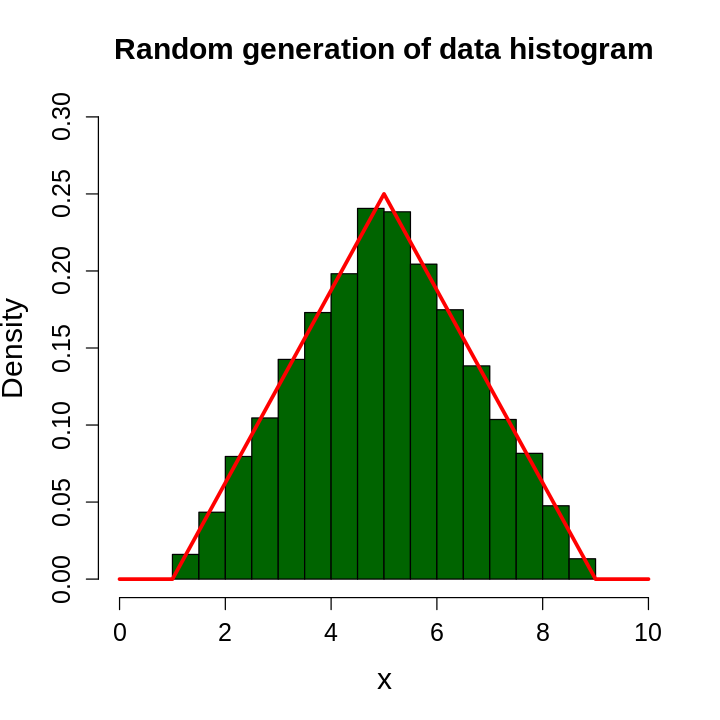

In [4]:
hist(func_r(10^4), col="darkgreen",xlab="x" ,main = "Random generation of data histogram", ylim=c(0,0.3),
       xlim=c(0,10),cex.lab=1.5,cex.axis=1.25,cex.main=1.5,cex.sub=1.5, freq=FALSE) 
x <-seq(0,10,0.001)
curve(func(x,1,9,5), col = "red", lwd=3, add=TRUE) #superimpose analytical curve

We could also have used the dtri() funciton defined in R in the library(EnvStats)
 

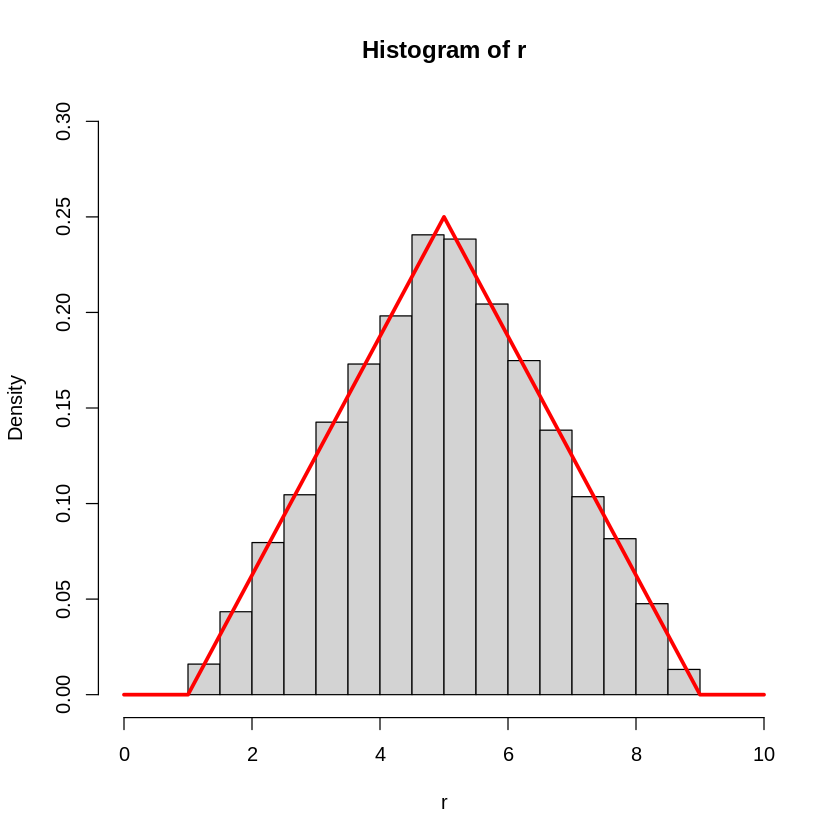

In [5]:
x<-seq(0,10,0.01)
xq<-seq(0,1,0.01)

set.seed(1234)
d <-dtri(x, min=1, max=9, mode=5) #min=ùëé, max=ùëè, and mode=ùëê.
p <- ptri(x, min=1, max=9, mode=5)
q <- qtri(xq, min = 1, max = 9, mode = 5)
r <- rtri(10^4, min = 1, max = 9, mode = 5)

options(repr.plot.width = 7, repr.plot.height = 7)
hist(r, xlim=c(0,10), freq=FALSE, yli=c(0,0.3))
curve(dtri(x, min=1, max=9, mode=5), col = "red", lwd=3, add=TRUE) 


### Exercise 2 - Markov‚Äôs inequality

Markov‚Äôs inequality represents an upper bound to probability distributions:

$$
\begin{array}{l}
P(X \geq k) \leq \frac{E[X]}{k} \text { for } k>0 \\
\end{array}
$$

having defined a function:

$$
\begin{array}{l}
G(k)=1-F(k) \equiv P(X \geq k)
\end{array}
$$

plot G(k) and the Markov‚Äôs upper bound for the following points:

1. The exponential, Exp(Œª= 1), distribution function
2. The uniform,U(3,5), distribution function
4. A Poisson, Pois(Œª= 1/2), distribution function
3. The binomial, Bin(n= 1,p= 1/2), distribution function

Warning message:
‚ÄúRemoved 70 row(s) containing missing values (geom_path).‚Äù


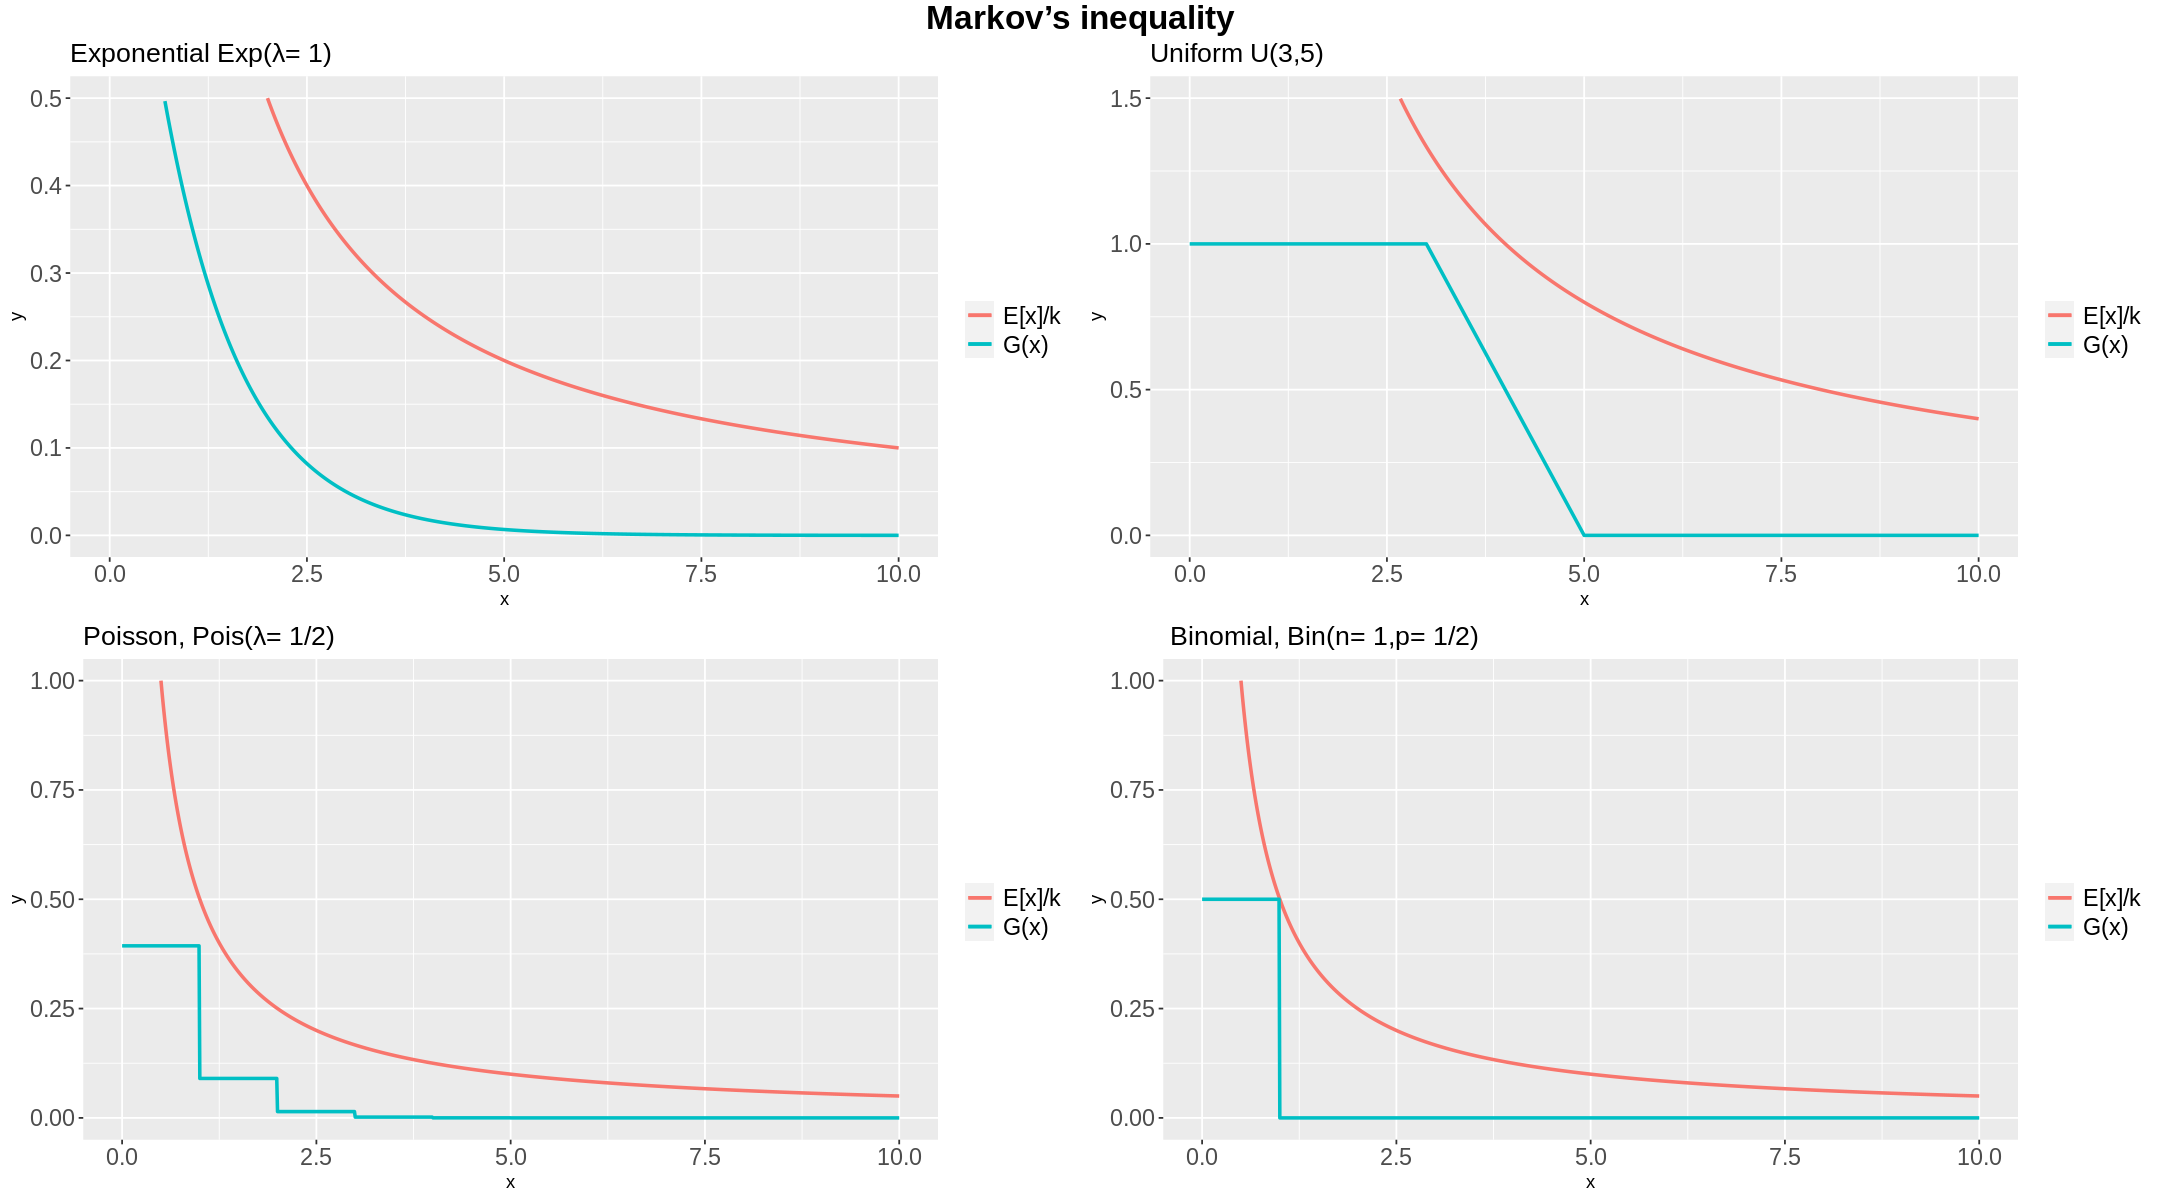

In [6]:
#---------------------------------- EXP -----------------------------------------
lambdax <- 1
k <- seq(0,10,0.01)
gkx <- 1- pexp(k, rate = lambdax)  
ekx <- 1/k


exp <- ggplot() + geom_line(aes(x=k, y=ekx, color="E[x]/k"), size=1) + geom_line(aes(x=k, y=gkx, color="G(x)"), size=1) +
          labs(title="Exponential Exp(Œª= 1)", x ="x", y = "y")+ylim(0,0.5) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14))

#---------------------------------- UNIF -----------------------------------------

k <- seq(0,10,0.01)
gkf <- 1- punif(k, min = 3, max = 5) 
ekf <- (1/2*(5+3))/k

unif <- ggplot() + geom_line(aes(x=k, y=ekf, color="E[x]/k"), size=1) + geom_line(aes(x=k, y=gkf, color="G(x)"), size=1) +
          labs(title="Uniform U(3,5)", x ="x", y = "y")+ ylim(0,1.5) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14))


#---------------------------------- BINOM -----------------------------------------


k <- seq(0,10,0.01)
gkb <- 1- pbinom(k, size=1, prob=1/2) 
ekb <- 0.5/k


bin <- ggplot() + geom_line(aes(x=k, y=ekb, color="E[x]/k"), size=1) + geom_line(aes(x=k, y=gkb, color="G(x)"), size=1) +
          labs(title=" Binomial, Bin(n= 1,p= 1/2)", x ="x", y = "y")+ ylim(0,1) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14))

#---------------------------------- POISSON -----------------------------------------

k <- seq(0,10,0.01)
gkp <- 1- ppois(k, lambda=1/2)   
ekp <- (1/2)/k


pois <- ggplot() + geom_line(aes(x=k, y=ekp, color="E[x]/k"), size=1) + geom_line(aes(x=k, y=gkp, color="G(x)"), size=1) +
          labs(title="Poisson, Pois(Œª= 1/2)", x ="x", y = "y")+ ylim(0,1) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14))

options(repr.plot.width = 18, repr.plot.height = 10)
title1=text_grob("Markov‚Äôs inequality", size = 20, face = "bold")  
grid.arrange(exp, unif,pois,bin, ncol=2, top=title1)

From the plots above we can see that Markov's inequality is verified since $G(x)$, the blu curve, is always below the red one of the factor $\frac{E[X]}{k}$




### Exercise 3 - Chebyshev‚Äôs inequality

Chebyshev‚Äôs inequality tell us that


$$
\begin{array}{c}
P(|X-\mu| \geq k \sigma) \leq \frac{1}{k^{2}} \\
\end{array}
$$

which can also be written as: 

$$
\begin{array}{c}
P(|X-\mu|<k \sigma) \geq 1-\frac{1}{k^{2}}
\end{array}
$$

use  R  to  show,  with  a  plot,  that  Chebyshev‚Äôs  inequality  is  is  an  upper  bound  to  the following distributions.


1. A normal distribution, N(Œº= 3,œÉ= 5) 
2. An exponential distribution, Exp(Œª= 1)
3. A uniform distribution U(1‚àí‚àö2,1 +‚àö2)
4. A Poisson, Pois(Œª= 1/3), distribution function

The term $P(|X-\mu|<k \sigma)$ can be evaluated in R as follows:

$$P(|X-\mu|<k \sigma) = pcorename(\mu + k \cdot \sigma) - pcorename(\mu - k \cdot \sigma) $$

where pcorename is the cumulative distribution function of the distrubution in the various cases, as indicated above.

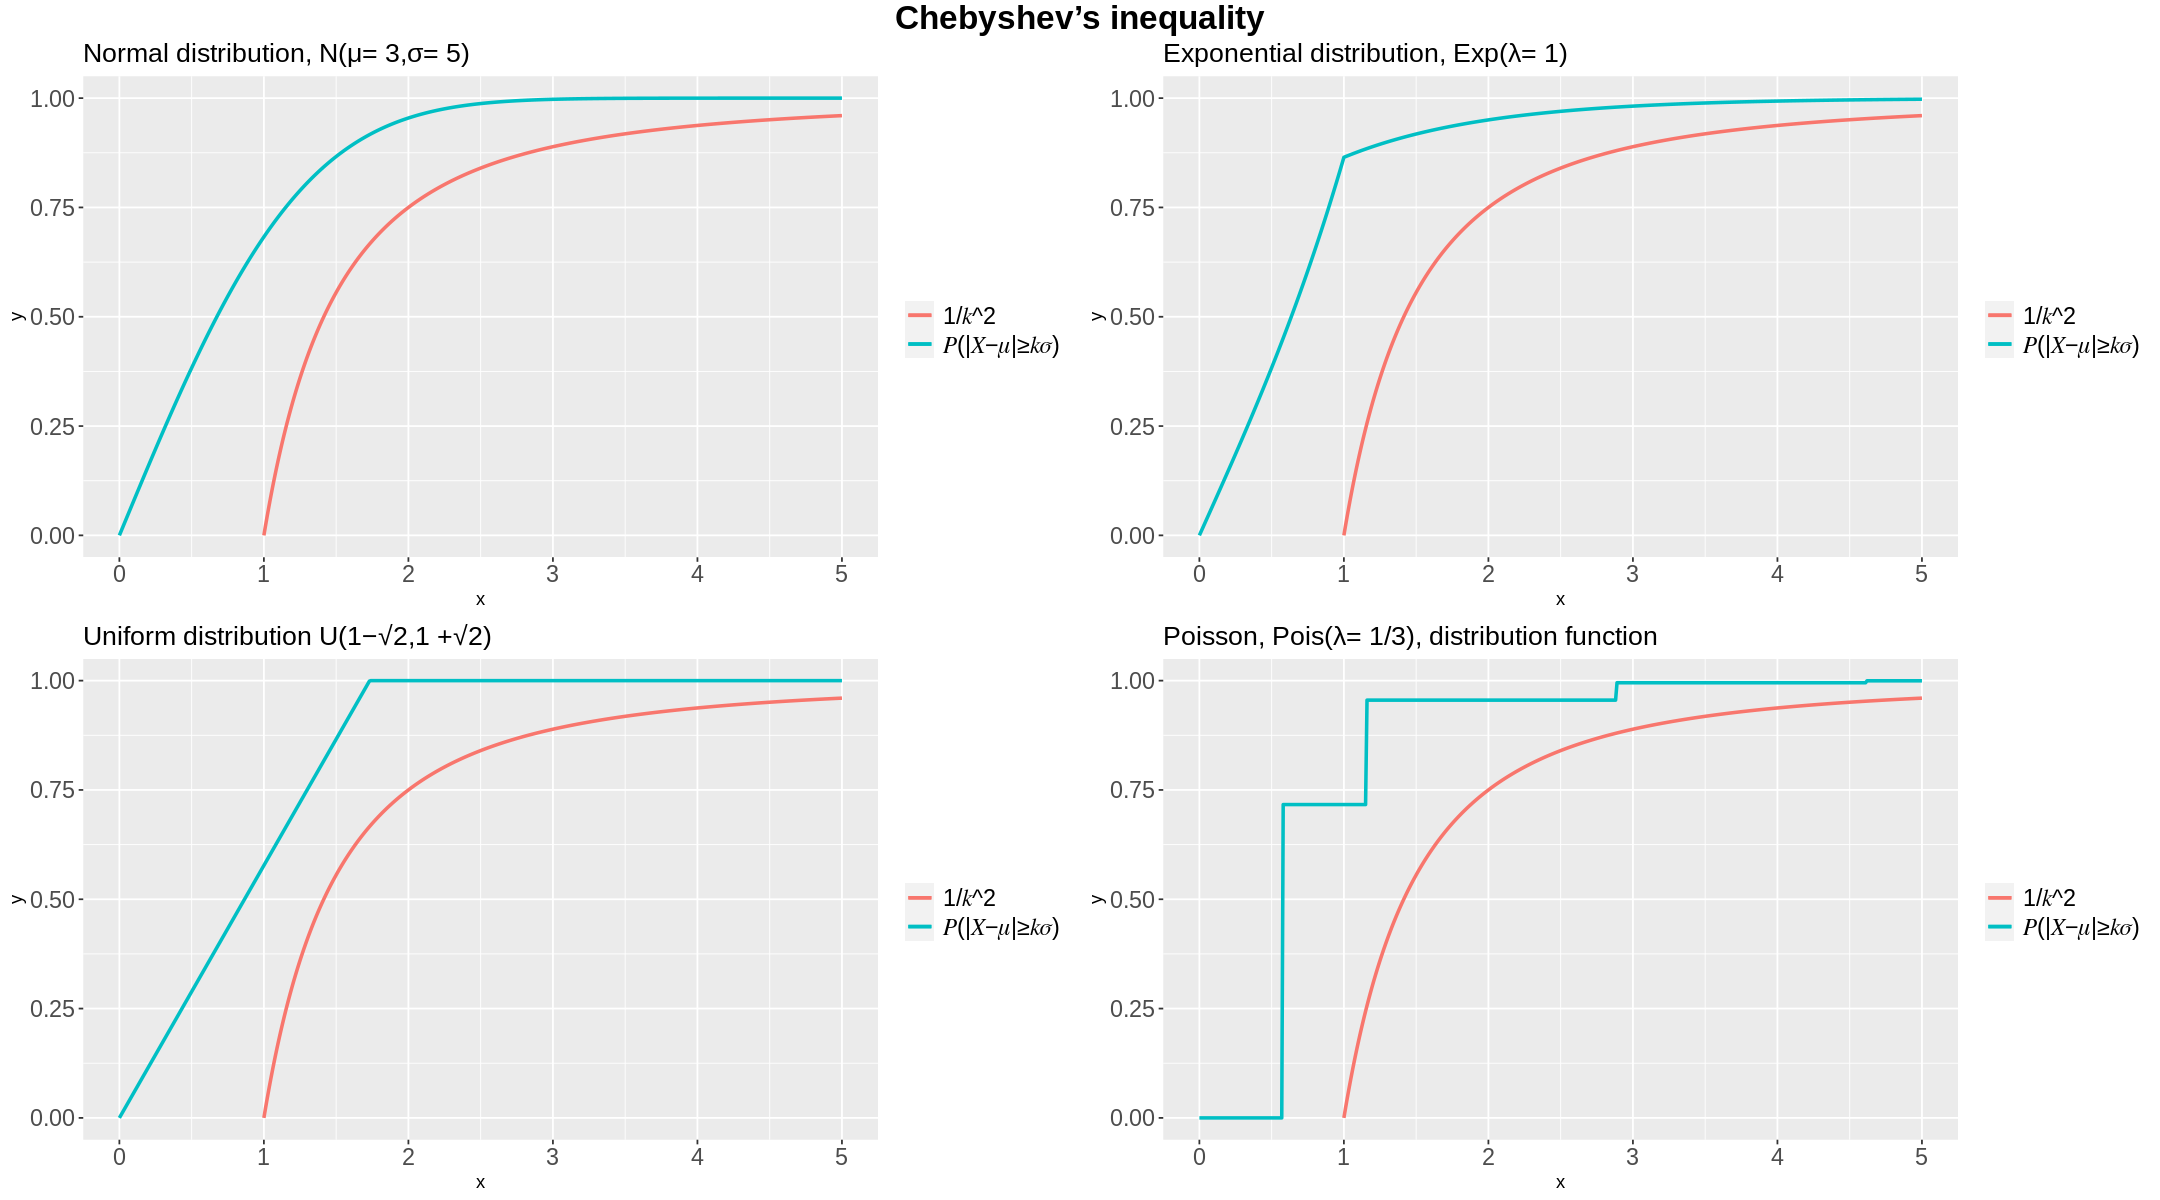

In [7]:

#--------------------------------- NORMAL ----------------------------------------

mu <- 3
sigma <- 5 

k <- seq(0,5,0.01)
p <- pnorm(mu + k*sigma, mean=3, sd=5) - pnorm(mu-k*sigma, mean=3, sd=5)  
vk <- 1-(1/k^2)


norm2 <- ggplot() + geom_line(aes(x=k, y=vk, color="1/ùëò^2"), size=1) + geom_line(aes(x=k, y=p, color="ùëÉ(|ùëã‚àíùúá|‚â•ùëòùúé)"), size=1) +
          labs(title="Normal distribution, N(Œº= 3,œÉ= 5) ", x ="x", y = "y")+ ylim(0,1) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14))

#---------------------------------- EXP -----------------------------------------

k <- seq(0,5,0.01)
lambdax <- 1
mux <- 1/lambdax
sigmax <- 1/lambdax^2

px <- pexp(mux + k*sigmax, rate = lambdax) - pexp(mux - k*sigmax, rate = lambdax)  
vk <- 1-(1/k^2)


exp2 <- ggplot() + geom_line(aes(x=k, y=vk, color="1/ùëò^2"), size=1) + geom_line(aes(x=k, y=px, color="ùëÉ(|ùëã‚àíùúá|‚â•ùëòùúé)"), size=1) +
          labs(title="Exponential distribution, Exp(Œª= 1)", x ="x", y = "y")+ ylim(0,1) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14))

#---------------------------------- UNIF ----------------------------------------


k <- seq(0,5,0.01)
muf <- ( 1 - sqrt(2)+ 1 + sqrt(2))/2
sigmaf <- ( 1 + sqrt(2)-( 1 - sqrt(2)))/sqrt(12)

pf <- punif(muf+k*sigmaf, min = 1-sqrt(2), max = 1+sqrt(2))  - punif(muf-k*sigmaf, min = 1-sqrt(2), max = 1+sqrt(2)) 
vk <- 1-(1/k^2)

unif2 <- ggplot() + geom_line(aes(x=k, y=vk, color="1/ùëò^2"), size=1) + geom_line(aes(x=k, y=pf, color="ùëÉ(|ùëã‚àíùúá|‚â•ùëòùúé)"), size=1) +
          labs(title="Uniform distribution U(1‚àí‚àö2,1 +‚àö2)", x ="x", y = "y")+ ylim(0,1) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14))

#---------------------------------- POIS -----------------------------------------
k <- seq(0,5,0.01)


lambdap <- 1/3
mup  <- lambdap
sigmap <- sqrt(lambdap)


pp <- ppois(mup+k*sigmap, lambda=lambdap) - ppois(mup-k*sigmap, lambda=lambdap) 
vk <- 1-(1/k^2)


pois2 <- ggplot() + geom_line(aes(x=k, y=vk, color="1/ùëò^2"), size=1) + geom_line(aes(x=k, y=pp, color="ùëÉ(|ùëã‚àíùúá|‚â•ùëòùúé)"), size=1) +
          labs(title="Poisson, Pois(Œª= 1/3), distribution function", x ="x", y = "y")+ ylim(0,1) +
          theme(axis.text=element_text(size=14), plot.title=element_text(size=16), 
          legend.title = element_text(color="white"),legend.text = element_text(size = 14)) 


options(repr.plot.width = 18, repr.plot.height = 10)
title1=text_grob("Chebyshev‚Äôs inequality", size = 20, face = "bold")  
grid.arrange(norm2,exp2,unif2,pois2, top=title1)



As we can see from the plots of the different cases, the Chebyshev's inequality is valid as 
$P(|X-\mu|<k \sigma)$, the blu curve, is always above the factor $1-\frac{1}{k^{2}}$, red curve.


### Exercise 4 - Community Mobility Open Data


Community Mobility Reports have been created with the aim to provide insights into whathas changed in response to policies aimed at combating COVID-19.  Data can be found at https://www.google.com/covid19/mobility/

Download and analyze the following data sets:-https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv and https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

The data show how visitors to (or time spent in) categorized places change compared tobaseline days.  A baseline day represents a normal value for that day of the week.  Thebaseline day is the median value from the 5-week period Jan 3 ‚Äì Feb 6, 2020.To make the reports useful, categories have been used to group some of the places withsimilar characteristics for purposes of social distancing guidance.  The following categories are available:

- retail and recreation, i.e. places like restaurants,cafes, shopping centers, theme parks,museums,libraries, and movie theaters
- groceryand pharmacy, i.e.  grocery markets, food warehouses, farmers markets, specialtyfood shops, drug stores, and pharmacies
- parks, i.e.  national parks, public beaches, marinas, dog parks, plazas,and public gardens
- transitstations i.e.  all public transport hubs such as subway, bus, and train stations
- workplaces, i.e.  places of work
- residential, i.e.  people‚Äôs residence

In [10]:
read_my_csv <- function(years, country) {
    filename <- paste0(years, "_", country, "_Region_Mobility_Report.csv")
    temp <- tempfile()
    download.file("https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip", temp)
    data <- read_csv(unz(temp, filename))
    unlink(temp)
    tibble(data)
    }

years <-2020:2021
country <- "IT"
data_mobility_IT <- map_df(years, read_my_csv, country) 

country <- "DE"
data_mobility_DE <- map_df(years, read_my_csv, country)  

country <- "FR"
data_mobility_FR <- map_df(years, read_my_csv, country) 

country <- "ES"
data_mobility_ES <- map_df(years, read_my_csv, country) 


‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)



‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î

In [11]:
data_mobility_IT$date <- lubridate::ymd(data_mobility_IT$date)
data_mobility_FR$date <- lubridate::ymd(data_mobility_FR$date)
data_mobility_DE$date <- lubridate::ymd(data_mobility_DE$date)
data_mobility_ES$date <- lubridate::ymd(data_mobility_ES$date)

Select a couple of European countries of your choice and analyze the trends in the previous variables over time: <br>
-  produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID-19 restrictions on mobility sitations.

##### Plot of the data by averaging the observable over a period of one week 

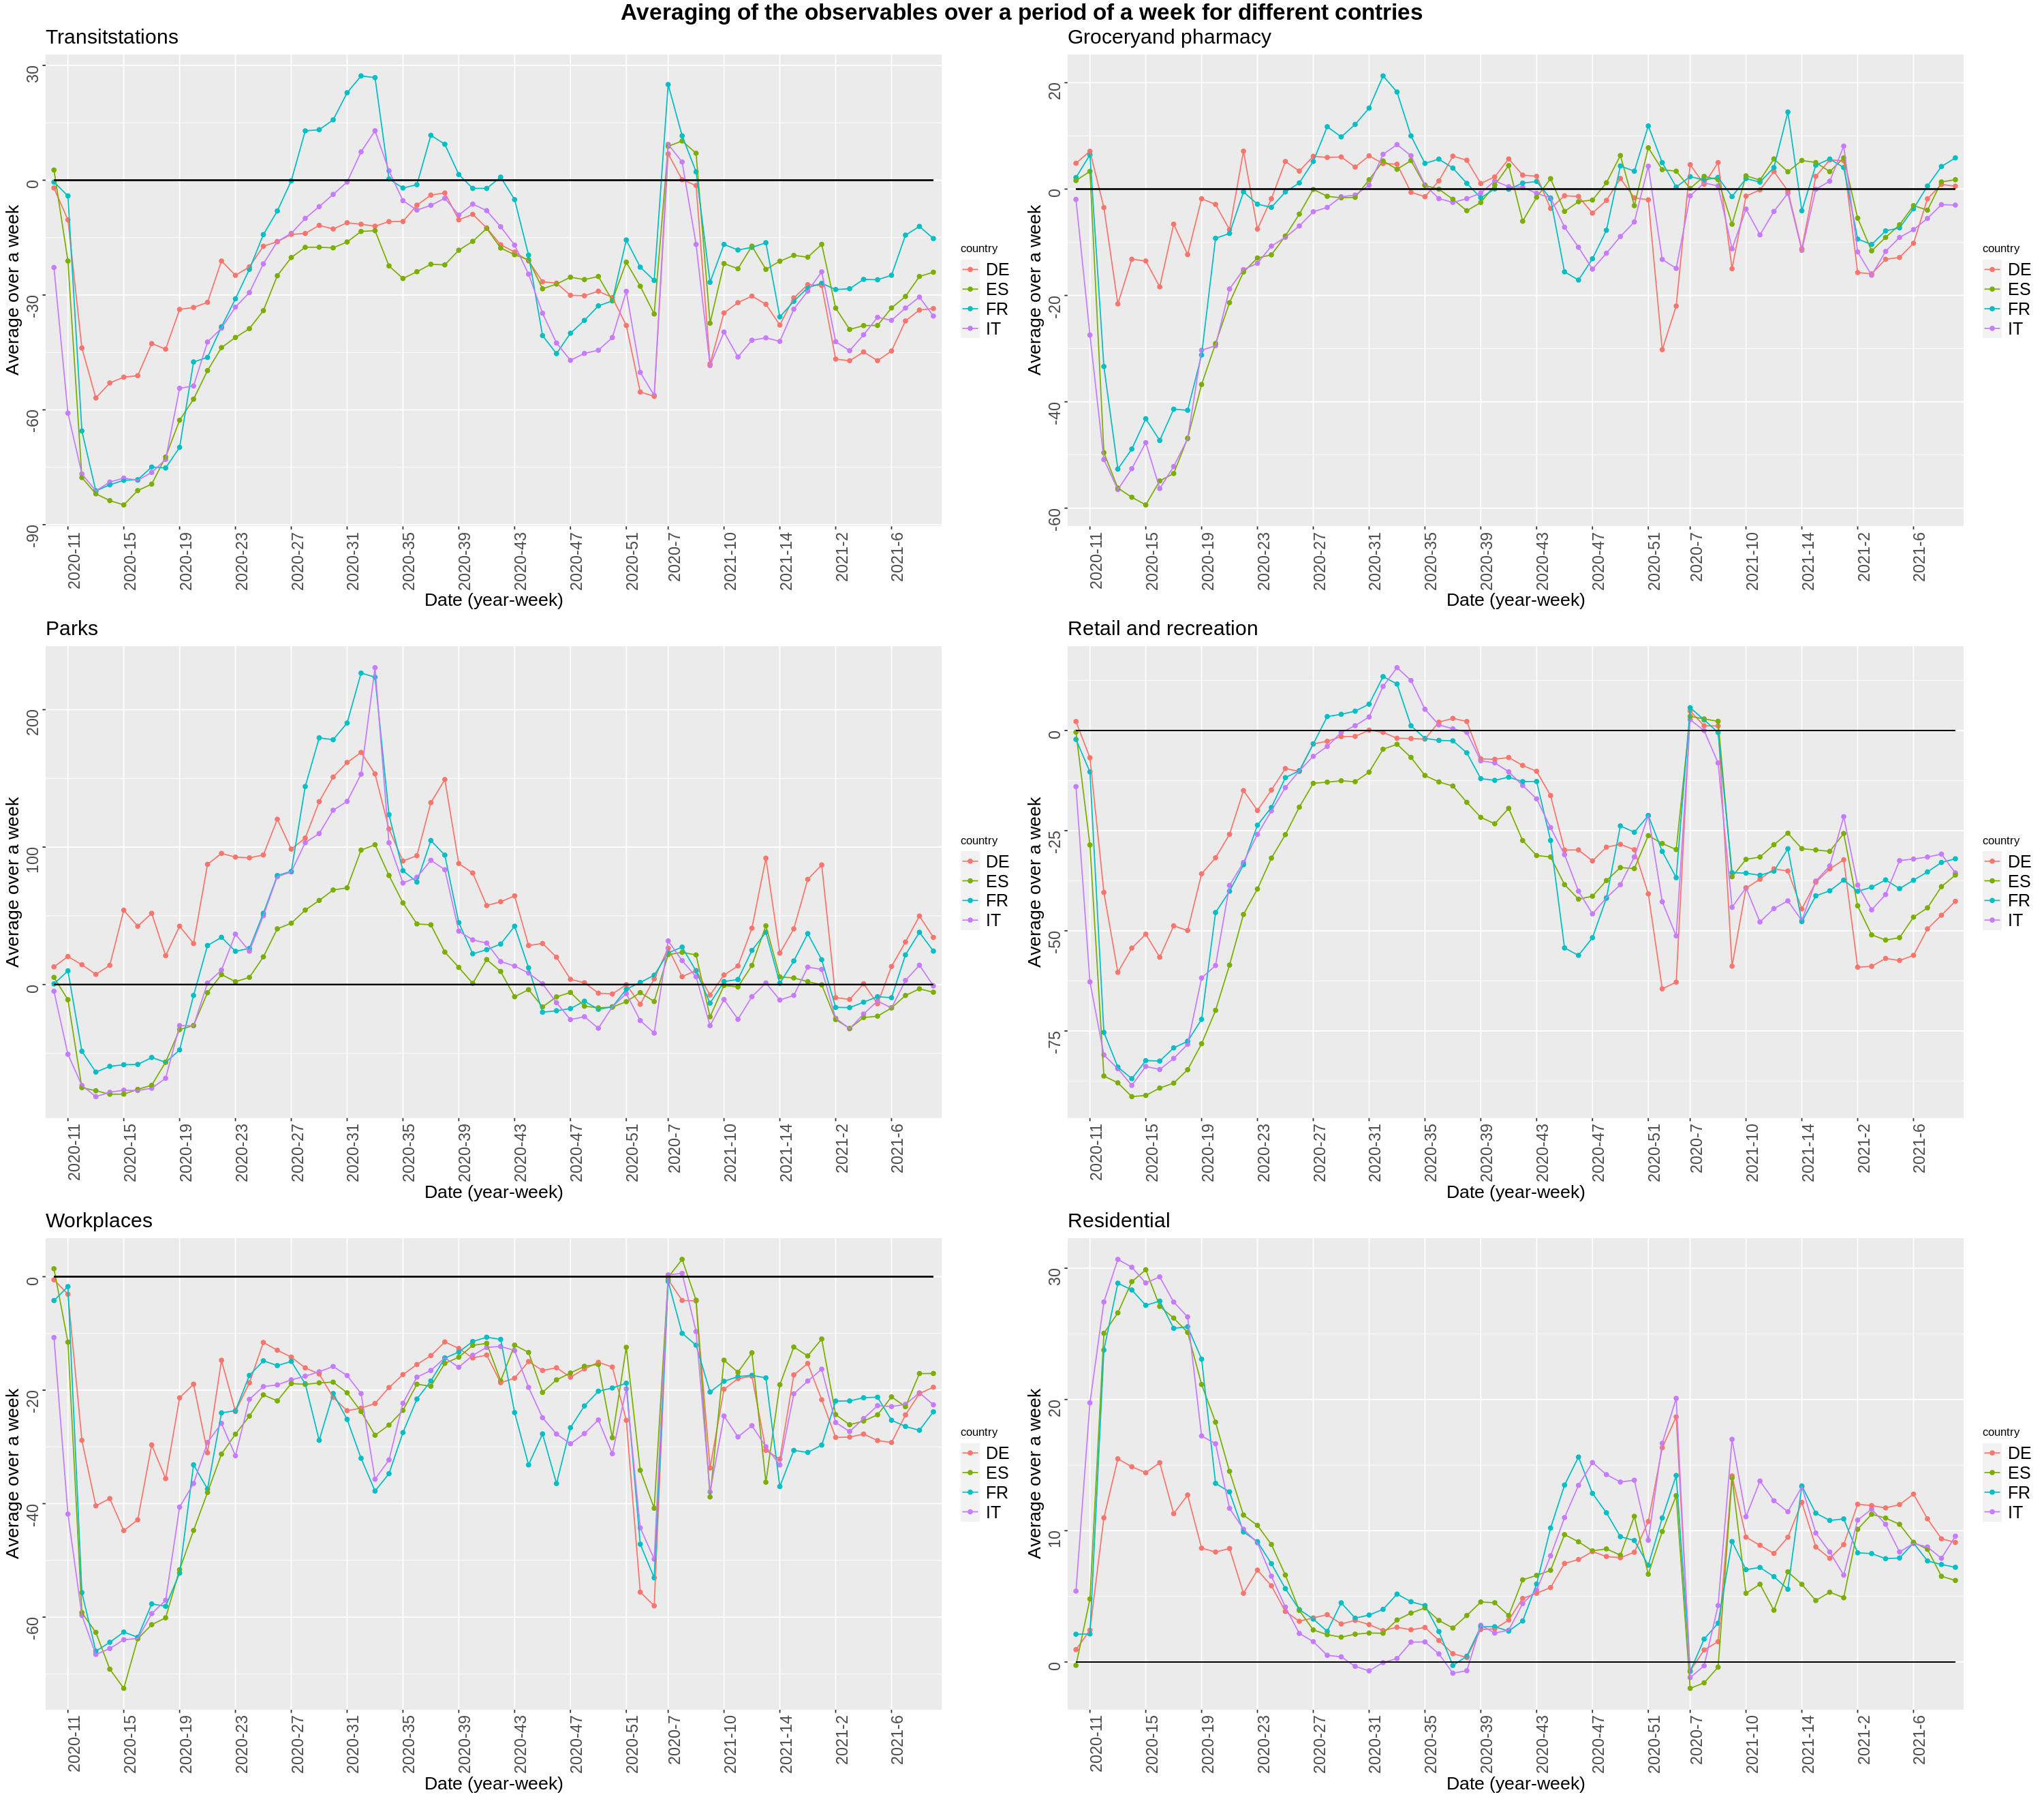

In [12]:
mean_week <- function(data_mobility){
    mean2020 <- data_mobility %>%  mutate(year = year(date))  %>% filter(date <= as.Date("2021-01-03"))  %>%  
            mutate(week = isoweek(date))  %>%   group_by(week) %>%  
              summarise( ret_rec = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                        gro_phar= mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                        parks= mean(parks_percent_change_from_baseline, na.rm=TRUE),
                        transit= mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                        workplaces = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                        residential = mean(residential_percent_change_from_baseline, na.rm=TRUE))  %>%
            add_column(year='2020') %>%    mutate(yearweek = paste0(year, '-', week)) 


    mean2021 <- data_mobility %>%  mutate(year = year(date))  %>% filter(date > as.Date("2021-01-03"))  %>%  
            mutate(week = isoweek(date))  %>%   group_by(week) %>%  
              summarise( ret_rec = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                        gro_phar= mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                        parks= mean(parks_percent_change_from_baseline, na.rm=TRUE),
                        transit= mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                        workplaces = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                        residential = mean(residential_percent_change_from_baseline, na.rm=TRUE))  %>%
            add_column(year='2021') %>%  mutate(yearweek = paste0(year, '-', week)) 
                

    mean <- bind_rows(mean2020, mean2021)
    return(mean)

}

meanIT_w <- mean_week(data_mobility_IT)  %>% add_column(country="IT")
meanDE_w <- mean_week(data_mobility_DE)  %>% add_column(country="DE")
meanFR_w <- mean_week(data_mobility_FR)  %>% add_column(country="FR")
meanES_w <- mean_week(data_mobility_ES)  %>% add_column(country="ES")

mean_country <- bind_rows(meanIT_w, meanDE_w, meanFR_w, meanES_w)


plot_func <- function(x,y){
options(repr.plot.width = 18, repr.plot.height = 10)
ggplot(mean_country, aes(x=factor(x), y=y, group=country, color=country)) + geom_point() + geom_line() + 
theme(axis.text=element_text(size=14, angle = 90, vjust = 0.5, hjust=1), plot.title=element_text(size=18), 
axis.title.x=element_text(size=16), axis.title.y=element_text(size=16),
legend.title = element_text(size = 10),legend.text = element_text(size = 15)) +
scale_x_discrete(breaks = x[c(T,F,F,F)]) +
geom_line(aes(x=x, y=0), size=0.5, color="black") #+ annotate(geom = "text", x = 7, y = 2, label = "baseline", hjust = "left")
}


transit_plt <- plot_func(mean_country$yearweek,mean_country$transit) +
             labs(title="Transitstations", x ="Date (year-week)", y="Average over a week")


gro_phar_plt <- plot_func(mean_country$yearweek,mean_country$gro_phar) + 
            labs(title="Groceryand pharmacy ", x ="Date (year-week)", y="Average over a week")


parks <- plot_func(mean_country$yearweek,mean_country$parks)+
            labs(title="Parks ", x ="Date (year-week)", y="Average over a week")


ret_rec <- plot_func(mean_country$yearweek,mean_country$ret_rec)+
            labs(title="Retail and recreation ", x ="Date (year-week)", y="Average over a week")


workplaces <- plot_func(mean_country$yearweek,mean_country$workplaces)+
            labs(title="Workplaces ", x ="Date (year-week)", y="Average over a week")


residential <- plot_func(mean_country$yearweek,mean_country$residential)+
            labs(title="Residential ", x ="Date (year-week)", y="Average over a week")



options(repr.plot.width = 25, repr.plot.height = 22)
title1=text_grob("Averaging of the observables over a period of a week for different contries", size = 20, face = "bold")  
grid.arrange(transit_plt,gro_phar_plt,parks,ret_rec, workplaces,residential, top=title1)

##### Plot of the data by averaging the observable over a period of a month 

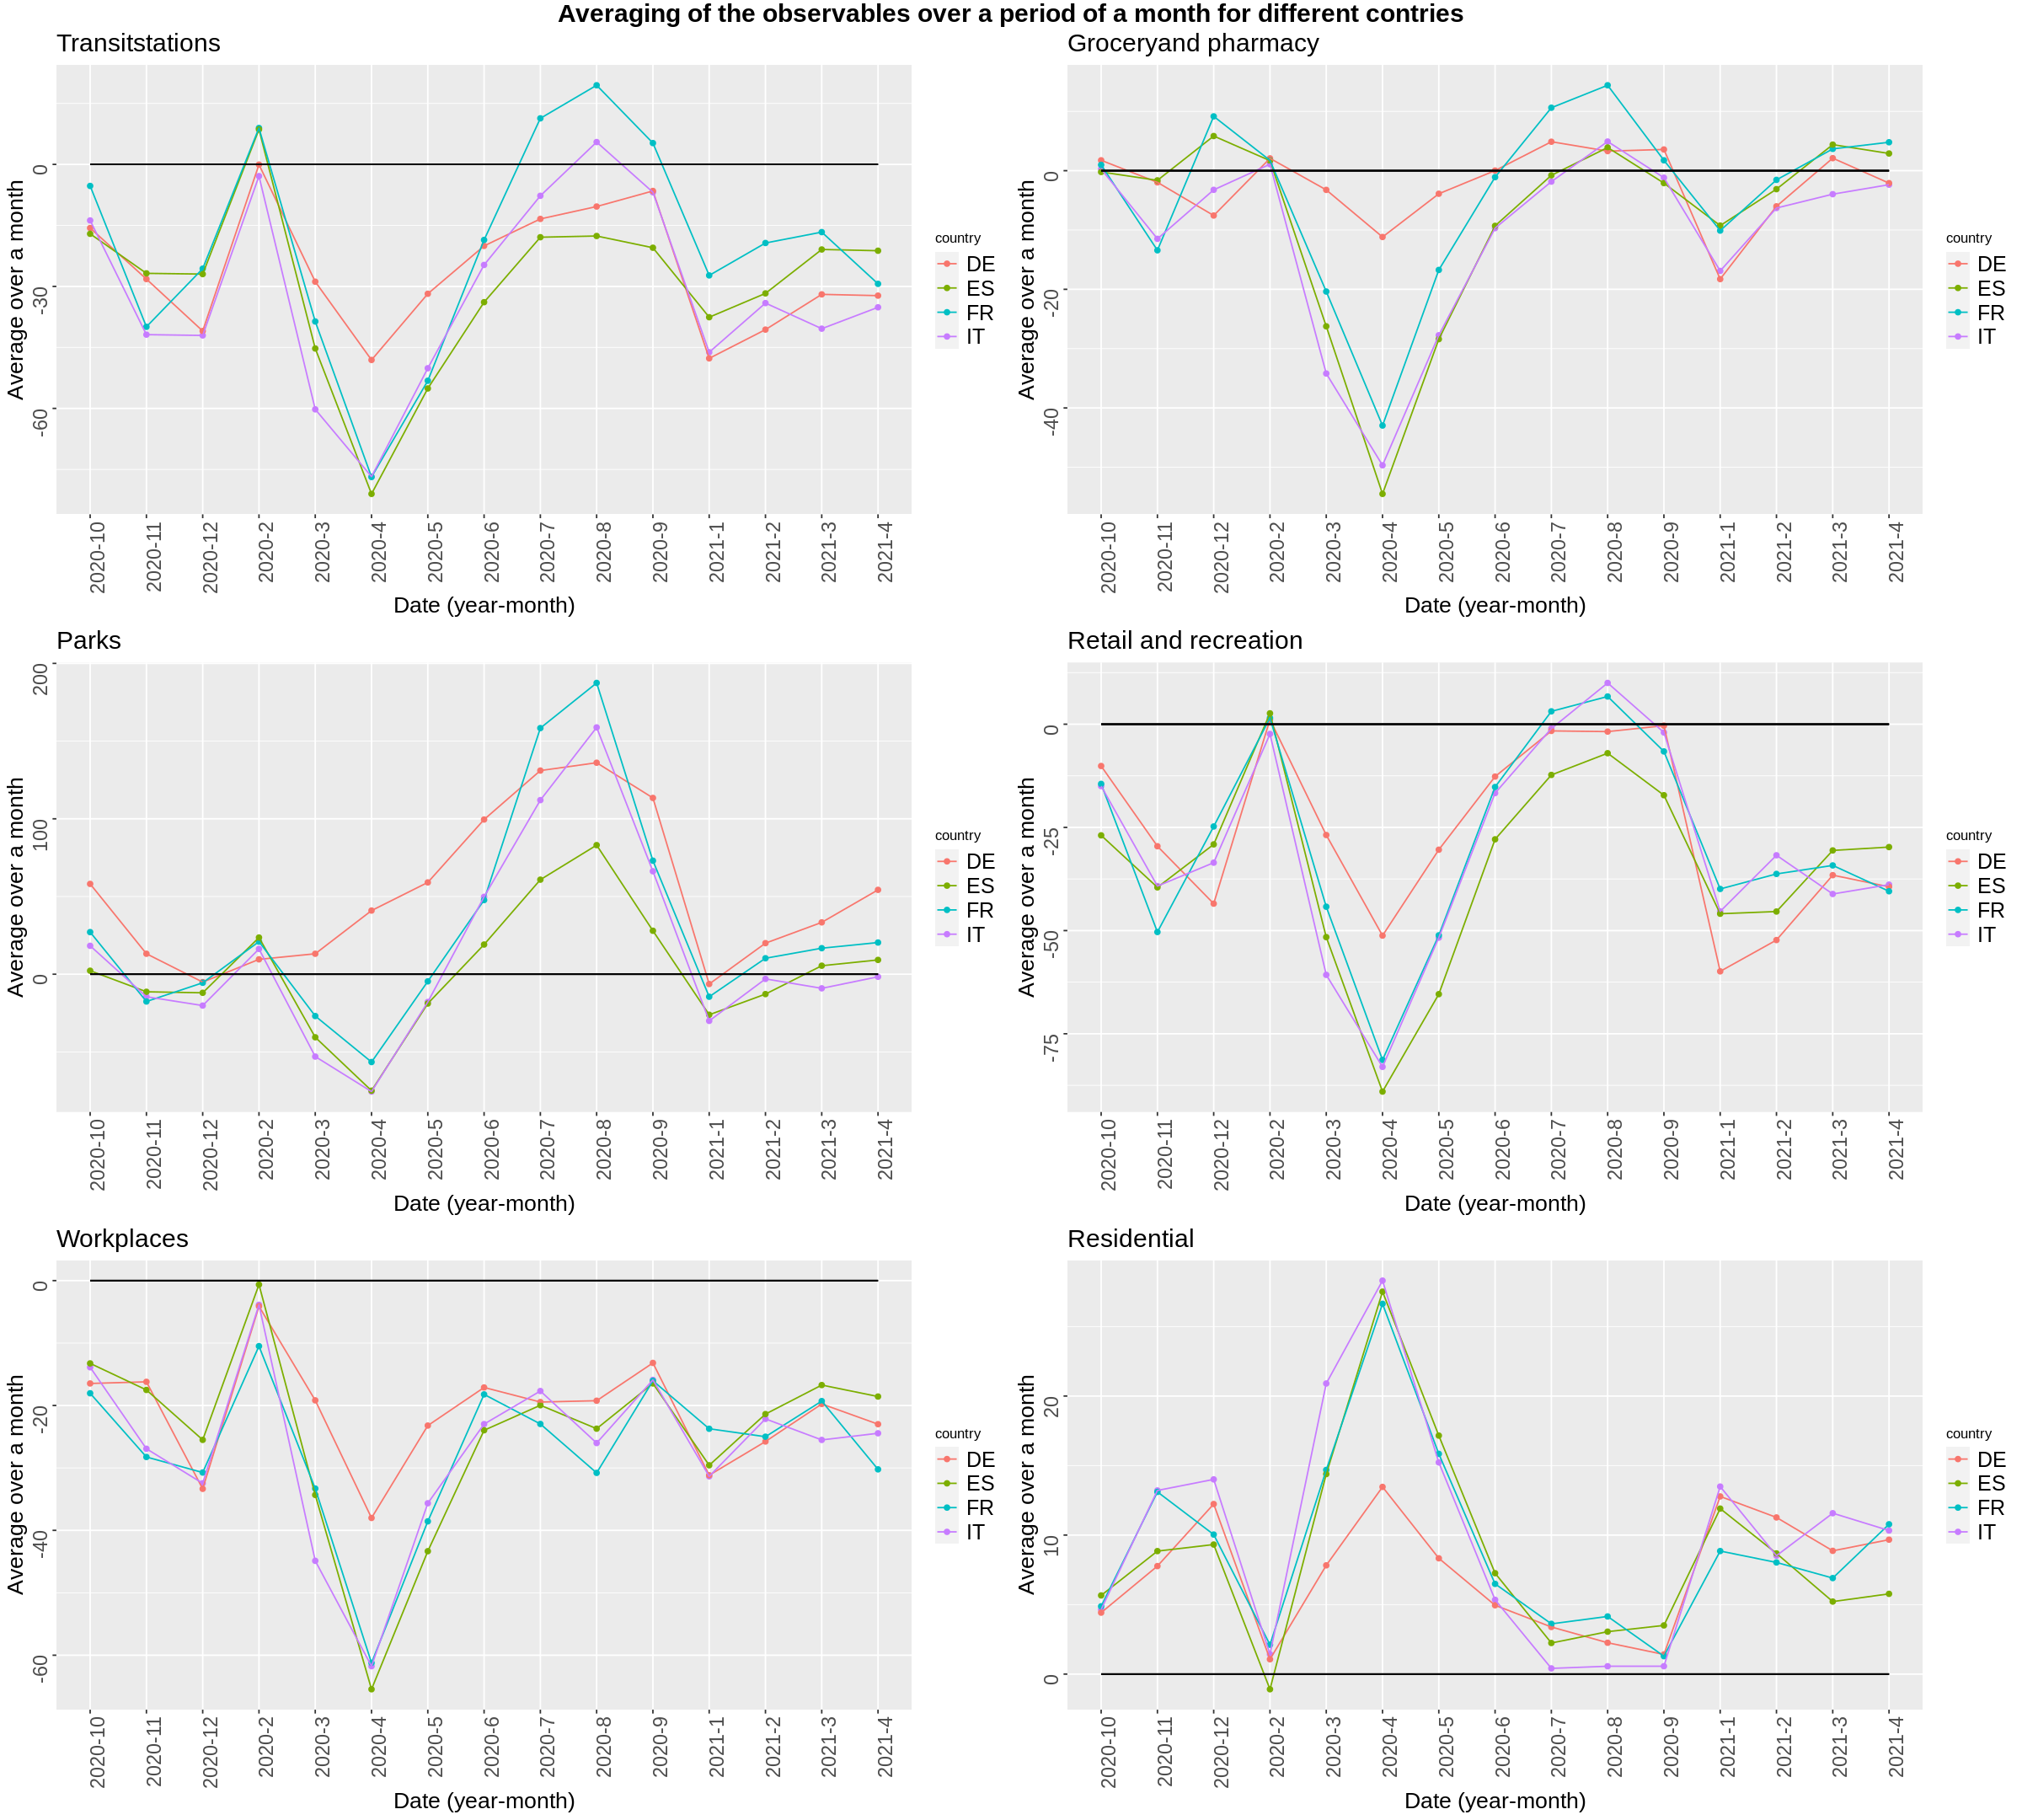

In [13]:
mean_month <- function(data_mobility){
    mean2020 <- data_mobility %>%  mutate(year = year(date))  %>% filter(year=="2020")  %>%  
            mutate(month = month(date))  %>%   group_by(month) %>%  
                        summarise( ret_rec = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                        gro_phar= mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                        parks= mean(parks_percent_change_from_baseline, na.rm=TRUE),
                        transit= mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                        workplaces = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                        residential = mean(residential_percent_change_from_baseline, na.rm=TRUE))  %>%
            add_column(year='2020') %>%    mutate(yearmonth = paste0(year, '-', month))

    mean2020 
    mean2021 <- data_mobility %>%  mutate(year = year(date))  %>% filter(year=="2021")  %>%  
            mutate(month = month(date))  %>%   group_by(month) %>%  
                        summarise( ret_rec = mean(retail_and_recreation_percent_change_from_baseline, na.rm=TRUE),
                        gro_phar= mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm=TRUE),
                        parks= mean(parks_percent_change_from_baseline, na.rm=TRUE),
                        transit= mean(transit_stations_percent_change_from_baseline, na.rm=TRUE),
                        workplaces = mean(workplaces_percent_change_from_baseline, na.rm=TRUE),
                        residential = mean(residential_percent_change_from_baseline, na.rm=TRUE)) %>%
            add_column(year='2021') %>%  mutate(yearmonth = paste0(year, '-', month)) 
                

    mean <- bind_rows(mean2020, mean2021)
    return(mean)

}

meanIT <- mean_month(data_mobility_IT)  %>% add_column(country="IT")
meanDE <- mean_month(data_mobility_DE)  %>% add_column(country="DE")
meanFR <- mean_month(data_mobility_FR)  %>% add_column(country="FR")
meanES <- mean_month(data_mobility_ES)  %>% add_column(country="ES")

mean_country <- bind_rows(meanIT, meanDE, meanFR, meanES)

plot_func <- function(x,y){
options(repr.plot.width = 18, repr.plot.height = 10)
ggplot(mean_country, aes(x=x, y=y, group=country, color=country)) + geom_point() + geom_line() + 
theme(axis.text=element_text(size=14, angle = 90, vjust = 0.5, hjust=1),
      plot.title=element_text(size=18), 
      axis.title.x=element_text(size=16), axis.title.y=element_text(size=16),
      legend.title = element_text(size = 10),legend.text = element_text(size = 15)) +
geom_line(aes(x=x, y=0), size=0.5, color="black") #+ annotate(geom = "text", x = 7, y = 2, label = "baseline", hjust = "left")
}


transit_plt <- plot_func(mean_country$yearmonth,mean_country$transit) +
             labs(title="Transitstations", x ="Date (year-month)" , y="Average over a month")


gro_phar_plt <- plot_func(mean_country$yearmonth,mean_country$gro_phar) + 
            labs(title="Groceryand pharmacy", x ="Date (year-month)", y="Average over a month")


parks <- plot_func(mean_country$yearmonth,mean_country$parks)+
            labs(title="Parks ", x ="Date (year-month)", y="Average over a month")


ret_rec <- plot_func(mean_country$yearmonth,mean_country$ret_rec)+
            labs(title="Retail and recreation ", x ="Date (year-month)", y="Average over a month")


workplaces <- plot_func(mean_country$yearmonth,mean_country$workplaces)+
            labs(title="Workplaces ", x ="Date (year-month)", y="Average over a month")


residential <- plot_func(mean_country$yearmonth,mean_country$residential)+
            labs(title="Residential ", x ="Date (year-month)", y="Average over a month")



options(repr.plot.width = 20, repr.plot.height = 18)
title1=text_grob("Averaging of the observables over a period of a month for different contries", size = 18, face = "bold")  
grid.arrange(transit_plt,gro_phar_plt,parks,ret_rec, workplaces,residential, top=title1)


###### Few comments

From the plots above (averaging over a month and a week) we can clearly see that during the "lockdown" period, (March, April and May) all the countries have a negative peak in all the categories.

The reduction in the use of transportation and also of pleople going to the workplaces is highly reduced, on the contrary we can observe a rise of the residential category, as one would expect. 


In general the values of the observables for France, Italy and Spain are quite similar, the one that deviates slightly the most is Germany. It's intresting to see that in Germany the parks have been more visited than usual during the lockdown, and even later on the months. 